# Forest Cover Classification Portfolio Project: Attempt 2

In the first attempt, we created a model using a NN with two middle layers of 64 and 32 neurons, a batch size of 1024, and 100 epochs. Trained using an Adam optimizer.

In this model, we'll aim to improve performance by making a model with three network layers between the input and output layers. These layers will have 128, 64, and 32 neurons, respectively.

We will also use 200 epochs, rather than 100.

To see how well the model predicts after it's trained, we'll then plot accuracy and loss and also check the precision, recall and f1 score. We'll also plot a confusion matrix.

Let's go...

In [1]:
# Doing the same task, but this time tweaking hyperparameters and neural net to try to improve accuracy and reduce loss
# Load the data...
import pandas as pd
from sklearn.model_selection import train_test_split
dataset = pd.read_csv('cover_data.csv')
features = dataset.iloc[:,0:-1]
labels = dataset.iloc[:,-1]
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.33, random_state=42, stratify=labels)

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

stan_scaler = StandardScaler()

features_train_normalized = stan_scaler.fit_transform(features_train)
features_test_normalized = stan_scaler.transform(features_test)

ct = ColumnTransformer([('numeric', StandardScaler(), ["Elevation", "Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points"])])

features_train_scale = ct.fit_transform(features_train)
features_test_scale = ct.transform(features_test)

In [7]:
# Build the model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, InputLayer

model = keras.Sequential()
model.add(InputLayer(input_shape=(features_train_scale.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
NUM_EPOCHS = 200
BATCH_SIZE = 1024
history = model.fit(features_train_scale, labels_train, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1, verbose=1)

Epoch 1/200
343/343 [==============================] - 2s 4ms/step - loss: 0.8326 - accuracy: 0.6690 - val_loss: 0.6559 - val_accuracy: 0.7155
Epoch 2/200
343/343 [==============================] - 1s 3ms/step - loss: 0.6308 - accuracy: 0.7255 - val_loss: 0.6136 - val_accuracy: 0.7335
Epoch 3/200
343/343 [==============================] - 1s 3ms/step - loss: 0.5994 - accuracy: 0.7386 - val_loss: 0.5978 - val_accuracy: 0.7362
Epoch 4/200
343/343 [==============================] - 1s 3ms/step - loss: 0.5766 - accuracy: 0.7503 - val_loss: 0.5685 - val_accuracy: 0.7532
Epoch 5/200
343/343 [==============================] - 1s 3ms/step - loss: 0.5587 - accuracy: 0.7589 - val_loss: 0.5537 - val_accuracy: 0.7596
Epoch 6/200
343/343 [==============================] - 1s 3ms/step - loss: 0.5441 - accuracy: 0.7657 - val_loss: 0.5383 - val_accuracy: 0.7673
Epoch 7/200
343/343 [==============================] - 1s 3ms/step - loss: 0.5319 - accuracy: 0.7721 - val_loss: 0.5321 - val_accuracy: 0.7708

Epoch 58/200
343/343 [==============================] - 1s 3ms/step - loss: 0.3847 - accuracy: 0.8394 - val_loss: 0.4027 - val_accuracy: 0.8327
Epoch 59/200
343/343 [==============================] - 1s 3ms/step - loss: 0.3835 - accuracy: 0.8399 - val_loss: 0.4024 - val_accuracy: 0.8324
Epoch 60/200
343/343 [==============================] - 1s 3ms/step - loss: 0.3838 - accuracy: 0.8394 - val_loss: 0.3979 - val_accuracy: 0.8342
Epoch 61/200
343/343 [==============================] - 1s 3ms/step - loss: 0.3808 - accuracy: 0.8413 - val_loss: 0.3992 - val_accuracy: 0.8349
Epoch 62/200
343/343 [==============================] - 1s 3ms/step - loss: 0.3803 - accuracy: 0.8411 - val_loss: 0.4132 - val_accuracy: 0.8271
Epoch 63/200
343/343 [==============================] - 1s 3ms/step - loss: 0.3793 - accuracy: 0.8423 - val_loss: 0.3896 - val_accuracy: 0.8406
Epoch 64/200
343/343 [==============================] - 1s 3ms/step - loss: 0.3778 - accuracy: 0.8425 - val_loss: 0.3942 - val_accuracy:

Epoch 115/200
343/343 [==============================] - 1s 3ms/step - loss: 0.3435 - accuracy: 0.8583 - val_loss: 0.3617 - val_accuracy: 0.8518
Epoch 116/200
343/343 [==============================] - 1s 3ms/step - loss: 0.3435 - accuracy: 0.8584 - val_loss: 0.3599 - val_accuracy: 0.8510
Epoch 117/200
343/343 [==============================] - 1s 3ms/step - loss: 0.3422 - accuracy: 0.8586 - val_loss: 0.3752 - val_accuracy: 0.8449
Epoch 118/200
343/343 [==============================] - 1s 3ms/step - loss: 0.3430 - accuracy: 0.8586 - val_loss: 0.3657 - val_accuracy: 0.8492
Epoch 119/200
343/343 [==============================] - 1s 3ms/step - loss: 0.3419 - accuracy: 0.8593 - val_loss: 0.3645 - val_accuracy: 0.8502
Epoch 120/200
343/343 [==============================] - 1s 3ms/step - loss: 0.3411 - accuracy: 0.8595 - val_loss: 0.3653 - val_accuracy: 0.8503
Epoch 121/200
343/343 [==============================] - 1s 3ms/step - loss: 0.3404 - accuracy: 0.8595 - val_loss: 0.3740 - val_ac

343/343 [==============================] - 1s 3ms/step - loss: 0.3228 - accuracy: 0.8671 - val_loss: 0.3452 - val_accuracy: 0.8575
Epoch 172/200
343/343 [==============================] - 1s 3ms/step - loss: 0.3211 - accuracy: 0.8687 - val_loss: 0.3458 - val_accuracy: 0.8588
Epoch 173/200
343/343 [==============================] - 1s 3ms/step - loss: 0.3243 - accuracy: 0.8657 - val_loss: 0.3472 - val_accuracy: 0.8590
Epoch 174/200
343/343 [==============================] - 1s 3ms/step - loss: 0.3206 - accuracy: 0.8684 - val_loss: 0.3471 - val_accuracy: 0.8582
Epoch 175/200
343/343 [==============================] - 1s 3ms/step - loss: 0.3214 - accuracy: 0.8680 - val_loss: 0.3437 - val_accuracy: 0.8601
Epoch 176/200
343/343 [==============================] - 1s 3ms/step - loss: 0.3202 - accuracy: 0.8689 - val_loss: 0.3478 - val_accuracy: 0.8579
Epoch 177/200
343/343 [==============================] - 1s 3ms/step - loss: 0.3194 - accuracy: 0.8693 - val_loss: 0.3434 - val_accuracy: 0.8607

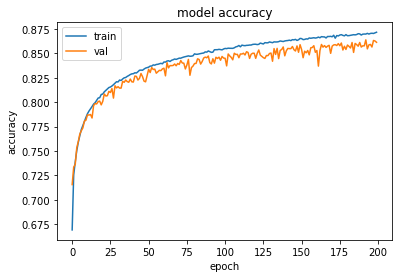

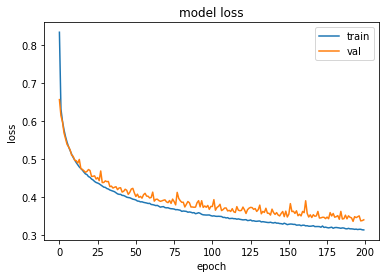

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

score = model.evaluate(features_test_scale, labels_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

prediction = model.predict(features_test_scale)
prediction = np.argmax(prediction, axis=1)

class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']
print(classification_report(labels_test, prediction, target_names=class_names))

Test loss: 0.3393574059009552
Test accuracy: 0.8597536087036133
5992/5992 [==============================] - 5s 807us/step
                   precision    recall  f1-score   support

       Spruce/Fir       0.84      0.88      0.86     69907
   Lodgepole Pine       0.89      0.87      0.88     93489
   Ponderosa Pine       0.82      0.86      0.84     11799
Cottonwood/Willow       0.75      0.75      0.75       907
            Aspen       0.73      0.60      0.65      3133
      Douglas-fir       0.77      0.65      0.70      5731
        Krummholz       0.88      0.87      0.87      6768

         accuracy                           0.86    191734
        macro avg       0.81      0.78      0.79    191734
     weighted avg       0.86      0.86      0.86    191734



In [13]:
prediction = np.argmax(model.predict(features_test_scale), axis=1)

5992/5992 [==============================] - 5s 813us/step


[Text(0, 0.5, 'Spruce/Fir'),
 Text(0, 1.5, 'Lodgepole Pine'),
 Text(0, 2.5, 'Ponderosa Pine'),
 Text(0, 3.5, 'Cottonwood/Willow'),
 Text(0, 4.5, 'Aspen'),
 Text(0, 5.5, 'Douglas-fir'),
 Text(0, 6.5, 'Krummholz')]

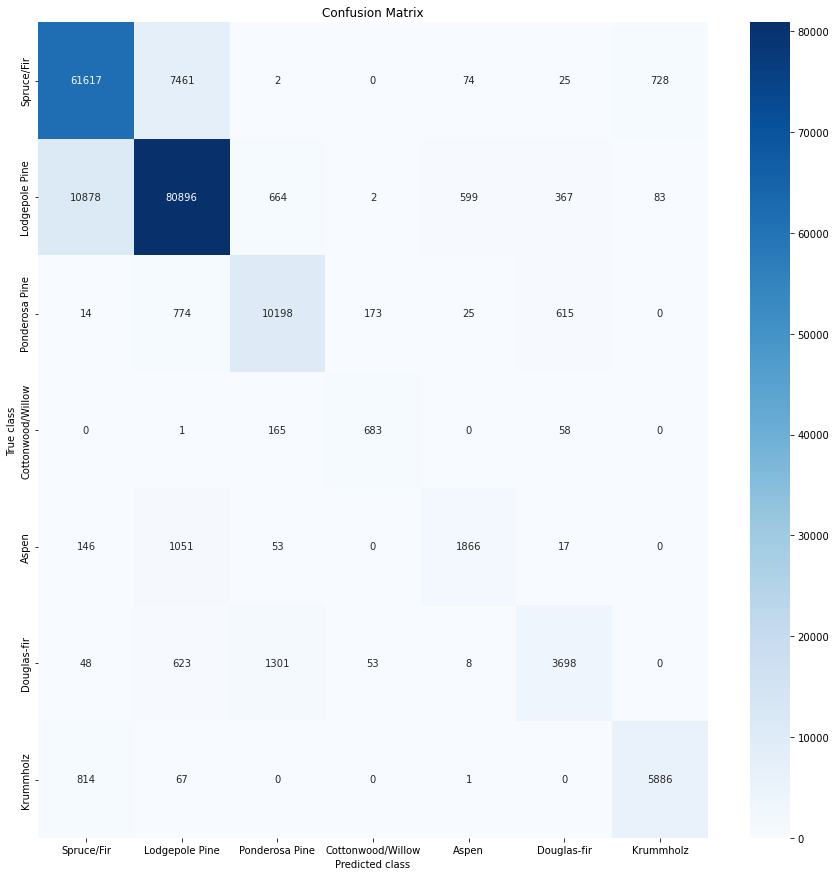

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(labels_test, prediction)
class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']
fig, ax = plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(cm, fmt='g', cmap='Blues', annot=True, ax=ax)
ax.set_xlabel('Predicted class')
ax.set_ylabel('True class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)

Overall, performance improved across the board compared to the first attempt. It will be helpful to see if adding layers improved performance, or letting the model train for longer over more epochs (or both?)

So far, we've just been mucking around, but a good start!